# Import Packages

In [1040]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.cross_validation import train_test_split
import seaborn as sns
import statsmodels.formula.api as smf
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

# Read Data

This dataset is about the cars and there various features which includes its displacement, no. of cylinders, mileage per gallon, horsepower of engine and so on.
To analyse the data and predict the mileage per gallon in the dataset through linear regression i am going to do the feature selection/variable selection and find out the relevant variables which is statistically significant in predicting the values of Dependent Variable 'mpg'. 

In [1041]:
Data = pd.read_csv('C:/Users/prana/Desktop/michael cave/mpg.csv')

*** Digging out some details about the data set provided using .info(), .head() and .describe() ***

In [1042]:
Data.head(10) 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [1043]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null int64
weight          392 non-null int64
acceleration    392 non-null float64
model_year      392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(3), int64(5), object(1)
memory usage: 27.6+ KB


In [1044]:
Data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


*** I am trying to see the association or correlation between various columns to find out basic insights down below with some visualizations ***

In [1045]:
df= Data[['mpg','cylinders','horsepower','displacement','weight','acceleration']]

In [1046]:
df.head()

,mpg,cylinders,horsepower,displacement,weight,acceleration
0,18.0,8,130,307.0,3504,12.0
1,15.0,8,165,350.0,3693,11.5
2,18.0,8,150,318.0,3436,11.0
3,16.0,8,150,304.0,3433,12.0
4,17.0,8,140,302.0,3449,10.5


*** From the heat map down below, it is pretty clear that there is a strong correlation between the variables cylinders , displacement and weight

In [1047]:
df.corr()

,mpg,cylinders,horsepower,displacement,weight,acceleration
mpg,1.000000,-0.777618,-0.778427,-0.805127,-0.832244,0.423329
cylinders,-0.777618,1.000000,0.842983,0.950823,0.897527,-0.504683
horsepower,-0.778427,0.842983,1.000000,0.897257,0.864538,-0.689196
displacement,-0.805127,0.950823,0.897257,1.000000,0.932994,-0.543800
weight,-0.832244,0.897527,0.864538,0.932994,1.000000,-0.416839
acceleration,0.423329,-0.504683,-0.689196,-0.543800,-0.416839,1.000000


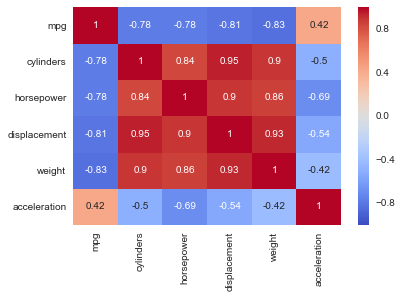

In [1048]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

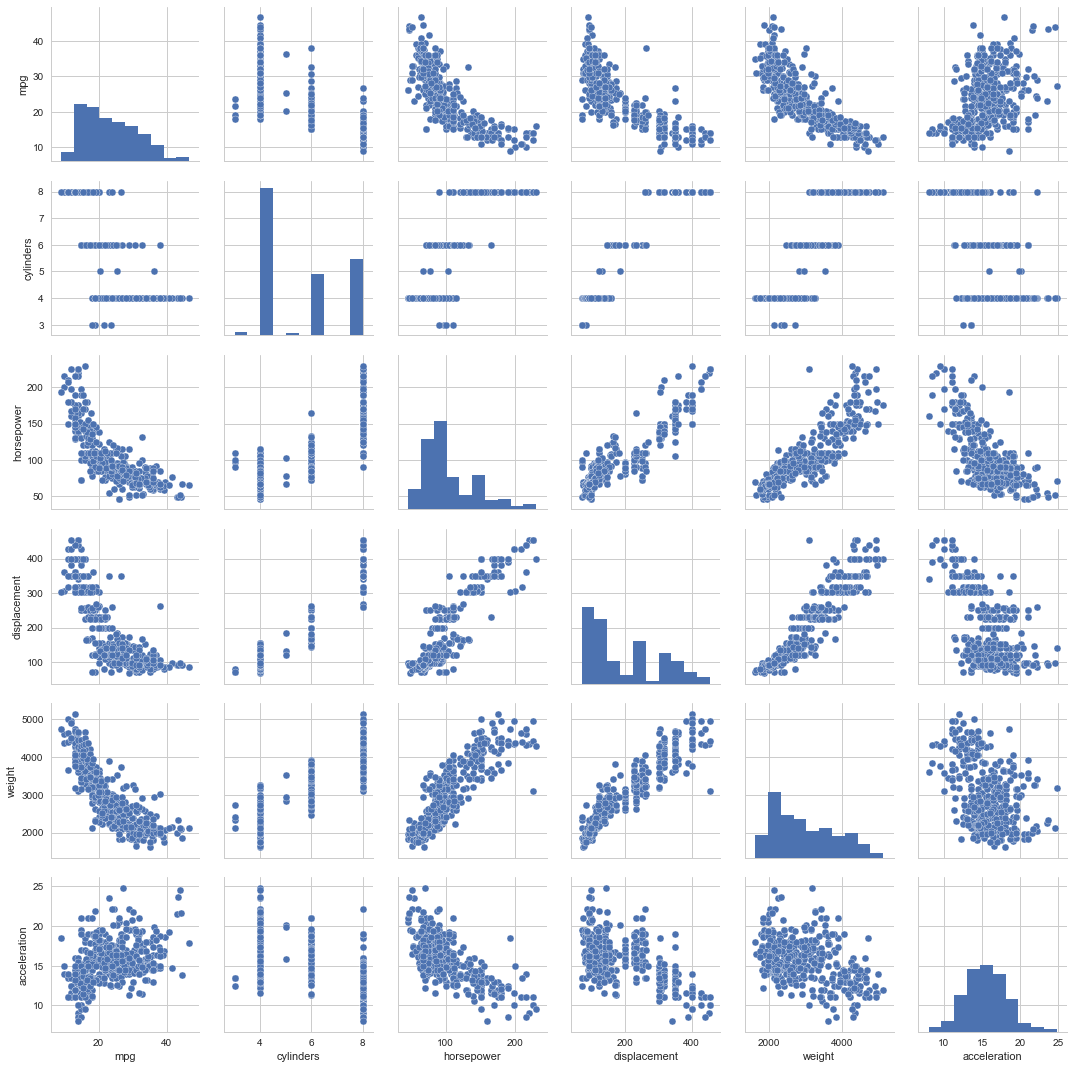

In [1049]:
sns.pairplot(df,palette= 'rainbow')

In [1050]:
#adding interation and square terms 
Data['cylinders_sq']=(Data['cylinders']**2)
Data['horsepower_sq']=(Data['horsepower']**2)
Data['displacement_sq']=(Data['displacement']**2)
Data['weight_sq']=(Data['weight']**2)

Data['hp_dis']=(Data['horsepower']*Data['displacement'])
Data['wt_dis']=(Data['weight']*Data['displacement'])


In [1051]:
names= Data.columns.values
names
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 15 columns):
mpg                392 non-null float64
cylinders          392 non-null int64
displacement       392 non-null float64
horsepower         392 non-null int64
weight             392 non-null int64
acceleration       392 non-null float64
model_year         392 non-null int64
origin             392 non-null int64
name               392 non-null object
cylinders_sq       392 non-null int64
horsepower_sq      392 non-null int64
displacement_sq    392 non-null float64
weight_sq          392 non-null int64
hp_dis             392 non-null float64
wt_dis             392 non-null float64
dtypes: float64(6), int64(8), object(1)
memory usage: 46.0+ KB


## Let's do the feature selection using stepwise selection method 

In [1052]:
X = pd.DataFrame(Data, columns=['cylinders','horsepower','displacement','weight','acceleration','origin','model_year'])
y = Data.mpg


def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)

Add  weight                         with p-value 6.0153e-102
Add  model_year                     with p-value 9.77226e-42
Add  origin                         with p-value 1.17818e-05
resulting features:
['weight', 'model_year', 'origin']


** features to be selected are as follows : 'weight','model_year','origin' **

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X1 to features selected and a variable y1 equal to the "mpg" column. **

In [1053]:
y1 = Data['mpg']
X1 = Data[['weight','model_year','origin']]


**Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**





In [1054]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=101)

# Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model  **

In [1055]:
from sklearn.linear_model import LinearRegression

In [1056]:
lm = LinearRegression()
model = lm.fit(X_train,y_train)
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-0.00614452  0.80094084  0.95328464]


# Predicting Test Data

**Now that we have fit our model, let's evaluate its performance by predicting off the test values**

In [1057]:
predictions = lm.predict( X_test)

**Create a scatterplot of the real test values versus the predicted values.**

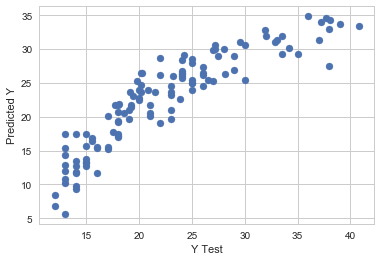

In [1058]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# Evaluating the Model

**Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).
Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. **

In [1059]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.55348755787
MSE: 9.94920368465
RMSE: 3.15423583212


# Residuals

**Let's quickly explore the residuals to make sure everything was okay with our data.** 

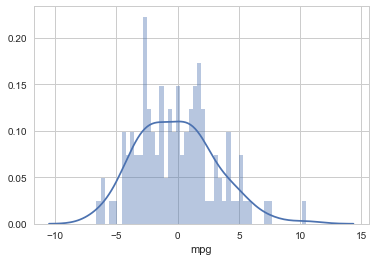

In [1060]:
sns.distplot((y_test-predictions),bins=50);

In [1061]:
print ('Score', model.score(X_test, y_test))

Score 0.807336423467


*** Though model looks simple and residual graph is also some what normally distributed we can go for interaction variables and square terms because what happens is, sometimes when we model using stepwise elimination method using p values, many interaction variables and square terms can get excluded beacuse of high p value or consideres insignificant which is due to the fact that may be the model needs more explainatory variable and the could exist a scenario where with the presence of those variables in the model these interation variables would also hold significance. 
In this case i would like to include the interaction variable and see if there involvement in the model can reduce rmse value to far lower value because linear modeling requires to have rmse value as low as possible to make a good fit. ***

# Including square terms and Interaction Variables

Since there are only a few variables in the dataset, we will keep trying to reduce the rmse by including square and interaction terms and make the fitting as good as we can make

**I have included all of the models and their rmse and accuracy values down below to show how these interaction variables and square terms impact on the rmse and accuracy of the predicted model**

In [1068]:

#X1 = Data[['origin', 'model_year','wt_dis','weight_sq','weight']] #RMSE: 2.64882962311 #Score 0.864131323339
#X1= Data[['origin', 'model_year','wt_dis','weight_sq','displacement','weight']] #RMSE: 2.63508922119 #Score 0.865537263616
#X1 = Data[['origin', 'model_year','wt_dis','weight_sq','displacement','weight','hp_dis']] #RMSE: 2.62112464284 #Score 0.866958649999
#X1 = Data[['origin', 'model_year','wt_dis','weight_sq','displacement','weight','horsepower','displacement_sq','cylinders','cylinders_sq']] #RMSE: 2.58534575023 #Score 0.873917976782   
#X1 = Data[['origin', 'model_year','wt_dis','weight_sq','displacement','weight','horsepower']] #RMSE: 2.57614003729 #Score 0.871486062309
#X1 = Data[['origin', 'model_year','wt_dis','weight_sq','displacement','weight','horsepower','displacement_sq','cylinders']] #RMSE: 2.55164901857 #Score 0.873917976782   


X1 = Data[['origin', 'model_year','wt_dis','weight_sq','displacement','weight','horsepower','displacement_sq']] #RMSE: 2.54520413561
    #Score 0.874554081259
    

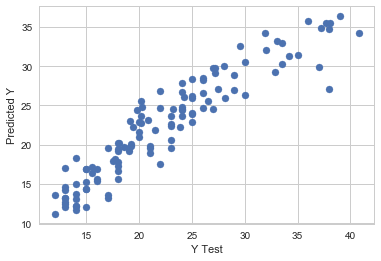

In [1069]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=101)
lm = LinearRegression()
model = lm.fit(X_train,y_train)
predictions = lm.predict( X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [1070]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.95117216576
MSE: 6.47806409192
RMSE: 2.54520413561


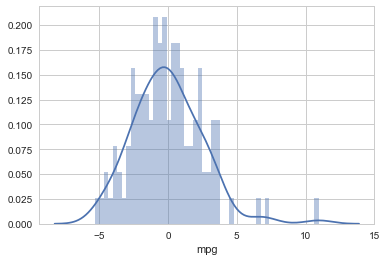

In [1071]:
sns.distplot((y_test-predictions),bins=50);



**Recreate the dataframe below.**

In [1072]:
coeffecient = pd.DataFrame(lm.coef_,X1.columns)
coeffecient.columns = ['Coeffecient']
coeffecient

,Coeffecient
origin,0.341137
model_year,0.823544
wt_dis,-0.000009
weight_sq,0.000002
displacement,-0.025563
weight,-0.015757
horsepower,-0.039711
displacement_sq,0.000125


# Accuracy of the predicted model

In [1073]:
print ('Score', model.score(X_test, y_test))

Score 0.874554081259


# Conclusion

In prediction we have got a good fit that we can validate by the normal distribution of residuals graph above which is also  better than the one we got from the model we got using stepwise elimination method.

Apart from that the accuracy of the model is 87.46% ie., better than all other models i ran that i could think of.

***I have included all other models that has been regressed linearly and the rmse value and model accuracy above along with the best model i got amongst them.***